In [15]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [16]:
df = pd.read_csv("california_housing_train.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [17]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

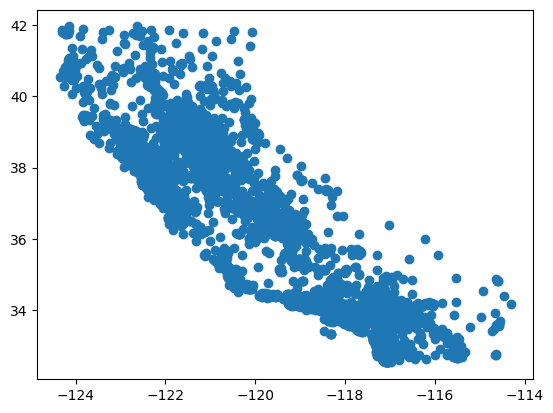

In [18]:
x_labels = df['longitude']
y_labels = df['latitude']
plt.scatter(x_labels,y_labels)
lag_la = df[['latitude','longitude']]

In [19]:
from sklearn.cluster import DBSCAN
cluster = DBSCAN()
x = lag_la.to_numpy()
cluster.fit(x)
values =  cluster.labels_
df['cluster'] = values

In [20]:
df['cluster'].value_counts()

cluster
 1    16982
-1       10
 0        8
Name: count, dtype: int64

In [21]:
from sklearn.metrics import silhouette_score
silhouette_score(x, cluster.labels_)

0.2589526181957224

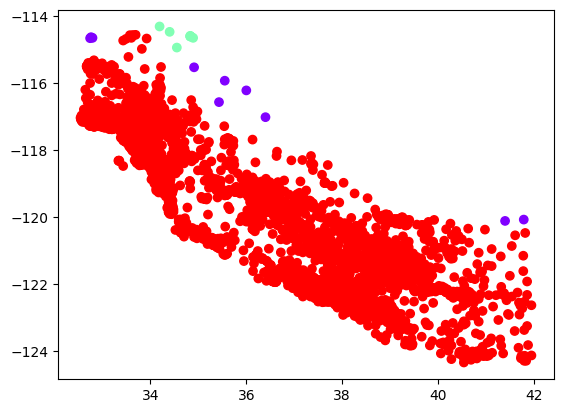

In [23]:
plt.scatter(x[:,0],x[:,1],c=values,cmap='rainbow')

In [24]:
epsilons = np.linspace(0.01,1,15)
epsilons


array([0.01      , 0.08071429, 0.15142857, 0.22214286, 0.29285714,
       0.36357143, 0.43428571, 0.505     , 0.57571429, 0.64642857,
       0.71714286, 0.78785714, 0.85857143, 0.92928571, 1.        ])

In [25]:
min_samples = np.arange(2,20,3)
min_samples

array([ 2,  5,  8, 11, 14, 17])

In [26]:
import itertools
combination = list(itertools.product(epsilons,min_samples))
combination

[(0.01, 2),
 (0.01, 5),
 (0.01, 8),
 (0.01, 11),
 (0.01, 14),
 (0.01, 17),
 (0.08071428571428571, 2),
 (0.08071428571428571, 5),
 (0.08071428571428571, 8),
 (0.08071428571428571, 11),
 (0.08071428571428571, 14),
 (0.08071428571428571, 17),
 (0.15142857142857144, 2),
 (0.15142857142857144, 5),
 (0.15142857142857144, 8),
 (0.15142857142857144, 11),
 (0.15142857142857144, 14),
 (0.15142857142857144, 17),
 (0.22214285714285714, 2),
 (0.22214285714285714, 5),
 (0.22214285714285714, 8),
 (0.22214285714285714, 11),
 (0.22214285714285714, 14),
 (0.22214285714285714, 17),
 (0.29285714285714287, 2),
 (0.29285714285714287, 5),
 (0.29285714285714287, 8),
 (0.29285714285714287, 11),
 (0.29285714285714287, 14),
 (0.29285714285714287, 17),
 (0.3635714285714286, 2),
 (0.3635714285714286, 5),
 (0.3635714285714286, 8),
 (0.3635714285714286, 11),
 (0.3635714285714286, 14),
 (0.3635714285714286, 17),
 (0.4342857142857143, 2),
 (0.4342857142857143, 5),
 (0.4342857142857143, 8),
 (0.4342857142857143, 11),
 

In [58]:
def get_scres_and_labels(combination,x):
    scores= []
    all_labels_list= []
    for i,(eps,min_samples) in enumerate(combination):
        dbscan = DBSCAN(eps= eps,min_samples=min_samples).fit(x)
        labels = dbscan.labels_
        labels_set = set(labels)
        num_cluster = len(labels_set)
        if -1 in labels_set:
            num_cluster -=1
        if num_cluster <2 or num_cluster >50:
            scores.append(-10)
            all_labels_list.append("bad")
            print("move on",num_cluster)
            continue
        
        scores.append( silhouette_score(x,labels))
        all_labels_list.append(labels)
        print(scores[-1])
    
    best_index = np.argmax(scores)
    best_parameters = combination[best_index]
    best_score = scores[best_index]
    print(scores[:])
    labels_values = labels
    return { best_score,best_parameters[:0],best_parameters[:1],labels}

In [ ]:
get_scres_and_labels(combination,x)